# TP Linear Regression

## Exercice 1

In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stat
import math as mp
import matplotlib.pyplot as plt
from sklearn import  linear_model
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.regression.linear_model as sm

### Question1°)

Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [54]:
df = pd.read_csv("invest.txt", sep = ' ')
print(df.head())

   year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50


### Question 2°)

Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

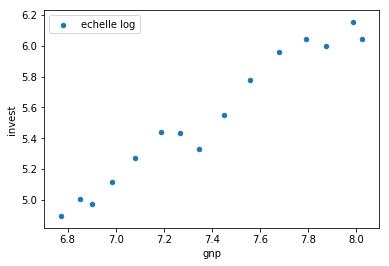

In [55]:
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])
df.plot.scatter(x='gnp',y='invest', label ='echelle log')
plt.show()

### Question 3°) 

In [56]:
%%latex
La pente et l'intercept de notre régression linéaire OLS est donnée par :
\begin{equation}
\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X} \ ,\ \ correspond \ à \ l'intercept
\end{equation}
\begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2} \ ,\ \ correspond \ à \ la \ pente
\end{equation}

L'écart-type globale de notre système est donné par :
\begin{equation}
\hat{\sigma} = \sqrt\frac{\sum(Y_i – \hat{Y}_i)^2} {n – 2}
\end{equation}

Nous en déduisons par la suite les erreur standard de \begin{equation} \hat{\beta}_0 \ et\ \hat{\beta}_1 \ \ , \ donnés \ par \ : \ \end{equation} 


\begin{equation}
\hat{\sigma}_{_\hat{\beta_0}} = \hat{\sigma} \sqrt{\frac{1} {n} + \frac{\sum(X_i)^2} {\sum(X_i – \bar{X})^2}} \ \ \ et \ \ \
\hat{\sigma}_{_\hat{\beta_1}} = \frac{\hat{\sigma}} {\sqrt{\sum(X_i – \bar{X})^2}}
\end{equation}

Et enfin, 
Le coefficient de détermination est :
\begin{equation}
{R^2} = \frac{\sum(Y_i – \hat{Y})^2} {\sum(Y_i – \bar{Y})^2}
\end{equation}

<IPython.core.display.Latex object>

In [57]:
Y_ = df['invest'].mean()
X = df['gnp']
X_ = df['gnp'].mean()
Y = df['invest']
    
numerateur = 0
denominateur = 0
    
for i in range(len(df['invest'])) :
    numerateur = numerateur + (Y[i] - Y_)*(X[i] - X_) 
    denominateur = denominateur + ((X[i] - X_)**2)
pente = numerateur / denominateur
intercept = Y_ - pente * X_
    
print ("La pense vaut :" "%.3f" % pente)
print("L'intercept vaut :" "%.3f" % intercept)


    
        ## Ecart type
n = len(X)
sigmahat = mp.sqrt((1 / (n - 2)) * ((Y - (intercept + pente * X))**2).sum())
print ("L'écart-type global vaut :" "%.3f" % sigmahat)

sigma_intercept = sigmahat * mp.sqrt( (1 / n) + X_**2  / ((X - X_)**2).sum() )
print ("L'écart-type de l'intercept vaut :" "%.3f" % sigma_intercept)
    
sigma_pente = sigmahat * mp.sqrt( 1  / ((X - X_)**2).sum() )
print ("L'écart-type de la pente vaut :" "%.3f" % sigma_pente)
    
        ## Coeff de détermination
Yhat = intercept + pente * X
R2 = 1 - (((Y - Yhat)**2).sum() / ((Y - Y_)**2).sum())
    
print ("Le coefficient de détermination vaut :" "%.3f" % R2)

La pense vaut :1.015
L'intercept vaut :-1.964
L'écart-type global vaut :0.088
L'écart-type de l'intercept vaut :0.410
L'écart-type de la pente vaut :0.055
Le coefficient de détermination vaut :0.963


### Question 4°)

Déterminons si  la p-value pour alpha = 0,05

In [58]:
Talpha = stat.t.ppf(0.975,df=len(X) - 2)

# Sum mean to the confidence interval
IntConf0 = pente - Talpha * sigma_pente
IntConf1 = pente + Talpha * sigma_pente

print ("Pente estimée Beta1 : %f" % pente)
print ("Intervalle de confiance autour de l'estimation de la pente est : [ %f, %f]" % (IntConf0, IntConf1))

print( "Nous remarquons que la valeur de la pense est dans l'intervalle de confiance ce qui nous pousse a rejeter l'hypothèse H0 pour alpha = 0,5")

StatistiqueZ = pente / sigma_pente
print ("\nLa Statistique de test vaut " "%.3f" % StatistiqueZ)
    
pval = stat.t.sf(np.abs(StatistiqueZ), n-2)*2
print ("La p-valuue vaut : " + str(round(pval,13)))

print ("De plus, notre p-value est nettement inférieur à notre intervalle de confiance. Cela nous conforte dans notre choix de rejeter H0.")


Pente estimée Beta1 : 1.015281
Intervalle de confiance autour de l'estimation de la pente est : [ 0.895634, 1.134929]
Nous remarquons que la valeur de la pense est dans l'intervalle de confiance ce qui nous pousse a rejeter l'hypothèse H0 pour alpha = 0,5

La Statistique de test vaut 18.332
La p-valuue vaut : 1.136e-10
De plus, notre p-value est nettement inférieur à notre intervalle de confiance. Cela nous conforte dans notre choix de rejeter H0.


### Question 5°)

In [59]:
Invest_predict = intercept + pente * mp.log(1000) ##mp.log()
print("La valeure prédite (invest) en log pour GNP = 1000 vaut : " "%.3f" %Invest_predict)

vals = stat.t.ppf(0.9,  n-2)

Sigma3 = sigmahat * np.sqrt( (1 / n) + (mp.log(1000) - X_)**2  / ((X - X_)**2).sum()) 
Sigma4 = sigmahat * np.sqrt( 1 + (1 / n) + (mp.log(1000) - X_)**2  / ((X - X_)**2).sum() )

CI1 =  Invest_predict - (vals * Sigma3) 
CI2 = Invest_predict + (vals * Sigma3) 
print ("L'intervale de confiance autour de investissement est : CI = " "[%.3f , %.3f]" % (CI1, CI2))
    
PI1 = Invest_predict - (vals * Sigma4) 
PI2 = Invest_predict + (vals * Sigma4) 
print ("L'intervale de prédiction autour de investissement est : PI = "  "[%.3f , %.3f]" % (PI1, PI2))


La valeure prédite (invest) en log pour GNP = 1000 vaut : 5.050
L'intervale de confiance autour de investissement est : CI = [5.003 , 5.097]
L'intervale de prédiction autour de investissement est : PI = [4.922 , 5.177]


### Question 6°)

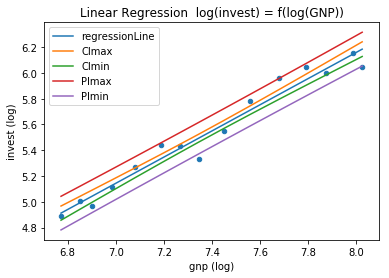

In [60]:
sigmaplt1 =  sigmahat * np.sqrt( (1 / n) + (X - X_)**2  / ((X - X_)**2).sum()) 
sigmaplt2 =  sigmahat * np.sqrt( 1 + (1 / n) + (X - X_)**2  / ((X - X_)**2).sum() )

df.plot.scatter(x='gnp',y='invest')
plt.plot(X, intercept + pente * X, label = 'regressionLine')
plt.plot(X, intercept + pente * X + (vals * sigmaplt1), label = 'CImax')
plt.plot(X, intercept + pente * X - (vals * sigmaplt1), label = 'CImin')
plt.plot(X, intercept + pente * X + (vals * sigmaplt2), label = 'PImax')
plt.plot(X, intercept + pente * X - (vals * sigmaplt2), label = 'PImin')
plt.xlabel('gnp (log)')
plt.ylabel('invest (log)')
plt.title("Linear Regression  log(invest) = f(log(GNP))")
plt.legend()
plt.show()

### Question 7°)

In [61]:
regLin = linear_model.LinearRegression().fit(X[: , np.newaxis], Y)
      
invest_predict_GNp1000 = regLin.predict(mp.log(1000))

        #Coefficient 
Coef = regLin.coef_
InTercept = regLin.intercept_
print("L'investissement prédit pour gnp = 1000 est : "  "%.3f " % invest_predict_GNp1000[0])
print("Le coefficient (pente) est bien celui trouvé précédement : " "%.3f" % Coef[0])
print("Le coefficient (intercept) est bien celui trouvé précédement : " "%.3f" % InTercept)

L'investissement prédit pour gnp = 1000 est : 5.050 
Le coefficient (pente) est bien celui trouvé précédement : 1.015
Le coefficient (intercept) est bien celui trouvé précédement : -1.964


### Question 8°)

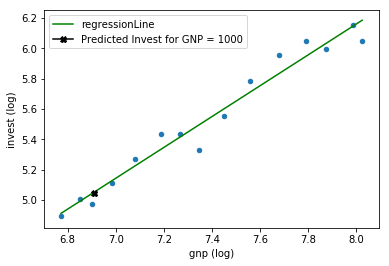

In [62]:

    
df.plot.scatter(x='gnp',y='invest')

plt.plot(X, InTercept + Coef * X, label = 'regressionLine', color = 'green')

plt.plot(np.log(1000), invest_predict_GNp1000 , \
            marker = "X", color= 'black',  \
            label = 'Predicted Invest for GNP = 1000') 
plt.xlabel('gnp (log)')
plt.ylabel('invest (log)')
plt.legend()
plt.show()

### Question 9°)

La matrice de Gram est donnée par 
\begin{equation} X^tX
\end{equation}
Ici, X comprend les variables log(GNP) et Interest.

Nous allons déterminer si la matrice de Gram est de regn plein. 
i.e. : symétrique et de valeurs propres différentes de 0.

In [63]:
sigmahat = mp.sqrt((1 / (n - 3)) * ((Y - (intercept + pente * X))**2).sum())
    
X2 = np.hstack([np.ones(shape = (len(Y),1)), df[['gnp', 'interest']]])
Xt = np.transpose(X2)
Gram_hat = np.matmul(Xt , X2) 
    
        #Pour determiner si la matrice est de rang plein il faut quelle soit 
        #inversible: 
            # ie: symétrique
            # et vap différentes de 0
    
print("Test de symétrie : " + str(Gram_hat[1,0]==Gram_hat[0,1]))
   
vap = np.linalg.eig(Gram_hat)[0]
print("Les valeurs propres de la matrice de gram sont : " + str(vap)+ "\n \
On remarque qu'elles ne sont pas nulles \n Donc la matrice de Gram est\
 de rang plein. \n \n \n")

Test de symétrie : True
Les valeurs propres de la matrice de gram sont : [1.73787190e+03 1.82369697e-02 4.12140362e+01]
 On remarque qu'elles ne sont pas nulles 
 Donc la matrice de Gram est de rang plein. 
 
 



### Question 10°)

On définit :
\begin{equation}
\hat{\beta} = {(X^tX)^{-1}X^tY}
\end{equation}
Permettant de donner \begin{equation} \hat{\beta}_0 , \hat{\beta}_1 , \hat{\beta}_2 \end{equation}

De même, les erreurs standards des beta sont donés par :
\begin{equation}
\hat{\sigma}^2_i = \hat{\sigma}^2{(X^tX)^{-1}_{i,i}}
\end{equation}

S'en suit des tests Statistique de Student sur ces différents éléments:

In [64]:
Y2 = np.hstack(df['invest'])
gram_inv = np.linalg.inv(Gram_hat)
    
        #Determinons les coefficients de beta
beta_hat = np.matmul(gram_inv, np.matmul(Xt, Y2))
print("Les trois coefficient sont les suivants : " )
print ("Beta0 :" "%.3f" % beta_hat[0])  
print ("Beta1 :" "%.3f" % beta_hat[1])   
print ("Beta2 :" "%.4f" % beta_hat[2])   
    
        #Determinons leurs variances :
sigbeta0 = mp.sqrt((sigmahat**2) * gram_inv[0,0])
sigbeta1 = mp.sqrt((sigmahat**2) * gram_inv[1,1])
sigbeta2 = mp.sqrt((sigmahat**2) * gram_inv[2,2])
print("L'écart-type du coefficient beta0 est : " "%.3f" % sigbeta0)
print("L'écart-type du coefficient beta1 est : " "%.3f" % sigbeta1)
print("L'écart-type du coefficient beta2 est : " "%.3f" % sigbeta2)
    
        # Coeff de détermination
Yhat = np.matmul(X2, beta_hat)
R2 = 1 - (((Y2 - Yhat)**2).sum() / ((Y2 - Y_)**2).sum())
print ("Le nouveau coeff de détermination est de : " "%.3f" % R2)
    
        # Pour beta 0
        
            #Statistique de test
StatistiqueZb0 = beta_hat[0] / sigbeta0
print ("La Statistique de test de beta 0 est : " "%.3f" % StatistiqueZb0)
    
            # déterminons la p-value 
pvalb0 = stat.t.sf(np.abs(StatistiqueZb0), n-3)*2
print ("La p-value de beta0 est : " + str(round(pvalb0,4)))
    
        # Pour beta 1
        
            #Statistique de test
StatistiqueZb1 = beta_hat[1] / sigbeta1
print ("La Statistique de test de beta 1 est : " "%.3f" % StatistiqueZb1)
    
            # déterminons la p-value 
pvalb1 = stat.t.sf(np.abs(StatistiqueZb1), n-3)*2
print ("La p-value de beta1 est : " + str(round(pvalb1,10)))
    
        # Pour beta 2
        
            #Statistique de test
StatistiqueZb2 = beta_hat[2] / sigbeta2
print ("La Statistique de test de beta 2 est : " "%.3f" % StatistiqueZb2)
    
            # déterminons la p-value 
pvalb2 = stat.t.sf(np.abs(StatistiqueZb2), n-3)*2
print ("La p-value de beta0 est : " + str(round(pvalb2,4)))

Les trois coefficient sont les suivants : 
Beta0 :-2.180
Beta1 :1.051
Beta2 :-0.0065
L'écart-type du coefficient beta0 est : 0.667
L'écart-type du coefficient beta1 est : 0.103
L'écart-type du coefficient beta2 est : 0.015
Le nouveau coeff de détermination est de : 0.963
La Statistique de test de beta 0 est : -3.267
La p-value de beta0 est : 0.0067
La Statistique de test de beta 1 est : 10.223
La p-value de beta1 est : 2.82e-07
La Statistique de test de beta 2 est : -0.422
La p-value de beta0 est : 0.6803


### Question 11°)
Nous allons ici déterminer l'intervalle de prédiction et l'intervalle de confiance de les valeurs de l'investissement prédit.

In [65]:
x = np.hstack([1, np.log(1000), 10])    
predicted_invest = np.matmul(x, beta_hat)
print("La valeur prévue de l'investissement est : " "%.3f" % (predicted_invest))
    
valstest = stat.t.ppf(0.9995,  n-2)
sigpredict = np.matmul(np.transpose(x), np.matmul(gram_inv, x))
    
            #Interval de prédiction
Ip1 = predicted_invest - (valstest * sigmahat * mp.sqrt(1 + sigpredict))
Ip2 = predicted_invest + (valstest * sigmahat * mp.sqrt(1 + sigpredict)) 
    
            #Interval de confiance
Ic1 = predicted_invest - (valstest * sigmahat * mp.sqrt(sigpredict)) 
Ic2 = predicted_invest + (valstest * sigmahat * mp.sqrt(sigpredict)) 
    
print("L'intervalle de prédiction est : \n      " "[%.3f , %.3f]" % (Ip1, Ip2))
print("L'intervalle de confiance est : \n      " "[%.3f , %.3f]" % (Ic1, Ic2))

La valeur prévue de l'investissement est : 5.016
L'intervalle de prédiction est : 
      [4.482 , 5.550]
L'intervalle de confiance est : 
      [4.646 , 5.386]


### Question 12°)

Graphe 3D des différentes variables :

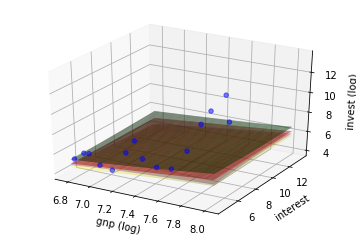

In [69]:
X2, Y2 = np.meshgrid(np.linspace(df.gnp.min(), df.gnp.max(), 100), np.linspace(df.interest.min(), df.interest.max(), 100)) 
    #onlyX = pd.DataFrame({'gnp (log)': x_surf.ravel(), 'interest ': y_surf.ravel()})
Z = beta_hat[0] + beta_hat[1] * X2 + beta_hat[2] * Y2

IpPlanUp = beta_hat[0] + beta_hat[1]*X2 + beta_hat[2]*Y2 + valstest * sigmahat * np.sqrt(1 + (gram_inv[0][0] + X2*gram_inv[1][0]+Y2*gram_inv[2][0])+X2*(gram_inv[0][1] + X2*gram_inv[1][1]+Y2*gram_inv[2][1])+Y2*(gram_inv[0][2] + X2*gram_inv[1][2]+Y2*gram_inv[2][2]))
IpPlanlow = beta_hat[0] + beta_hat[1]*X2 + beta_hat[2]*Y2 - valstest * sigmahat * np.sqrt(1 + (gram_inv[0][0] + X2*gram_inv[1][0]+Y2*gram_inv[2][0])+X2*(gram_inv[0][1] + X2*gram_inv[1][1]+Y2*gram_inv[2][1])+Y2*(gram_inv[0][2] + X2*gram_inv[1][2]+Y2*gram_inv[2][2]))

IcPlanUp = beta_hat[0] + beta_hat[1]*X2 + beta_hat[2]*Y2 + valstest * sigmahat * np.sqrt((gram_inv[0][0] + X2*gram_inv[1][0]+Y2*gram_inv[2][0])+X2*(gram_inv[0][1] + X2*gram_inv[1][1]+Y2*gram_inv[2][1])+Y2*(gram_inv[0][2] + X2*gram_inv[1][2]+Y2*gram_inv[2][2]))
IcPlanlow = beta_hat[0] + beta_hat[1]*X2 + beta_hat[2]*Y2 - valstest * sigmahat * np.sqrt((gram_inv[0][0] + X2*gram_inv[1][0]+Y2*gram_inv[2][0])+X2*(gram_inv[0][1] + X2*gram_inv[1][1]+Y2*gram_inv[2][1])+Y2*(gram_inv[0][2] + X2*gram_inv[1][2]+Y2*gram_inv[2][2]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['gnp'],df['invest'],df['interest'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(X2,Y2, Z.reshape(X2.shape) , color='red', alpha=0.5)
    
ax.plot_surface(X2,Y2,  (IpPlanUp).reshape(X2.shape) , color='green', alpha=0.3)
ax.plot_surface(X2,Y2, (IpPlanlow).reshape(X2.shape) , color='yellow', alpha=0.3)
ax.plot_surface(X2,Y2, IpPlanUp.reshape(X2.shape) , color='black', alpha=0.3)
ax.plot_surface(X2,Y2, (IcPlanlow).reshape(X2.shape) , color='purple', alpha=0.3)
    
ax.set_xlabel('gnp (log)')
ax.set_ylabel('interest')
ax.set_zlabel('invest (log)')
plt.show()

### Question 13°) 

Déterminations des coefficients par l'utilisation d'une librairie existante : 

In [72]:
Y = np.hstack(df['invest'])
X = np.hstack([np.ones(shape = (len(Y),1)), df[['gnp', 'interest']]])


results = sm.OLS(Y, X).fit().params
print("Beta 0 vaut : " "%.3f" % results[0])
print("Beta 1 veut : " "%.3f" % results[1])
print("Beta 2 vaut : " "%.3f" % results[2])

Beta 0 vaut : -2.180
Beta 1 veut : 1.051
Beta 2 vaut : -0.007
